In [1]:
import torch
from torch_geometric.data import Data, Dataset, Batch
from torch_geometric.data import DataLoader
from torch_geometric.datasets import TUDataset


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
DB_order=pd.read_csv("data/DB_order_parameters_POPC.csv",sep=",",header=0)
DB_order

,Papertag,Molecule1,Molecule2,Membrane,molp1,molp2,molpm,Temperature,WTp,2,...,7,8,9,10,11,12,13,14,15,16
0,1MIM298POPCG,0,0,POPC,0.0,0,100,298,50.0,0.219000,...,0.19600,0.189000,0.182000,0.172000,0.155000,0.141000,0.122000,0.103000,0.077000,0.02300
1,1MIM298POPCG,MIM,0,POPC,76.8,0,100,298,50.0,0.191000,...,0.16100,0.147000,0.135000,0.117000,0.106000,0.092000,0.081000,0.068000,0.055000,0.01700
2,1POPC300POPC,0,0,POPC,0.0,0,100,300,NaN,0.218805,...,0.19785,0.187499,0.180161,0.170479,0.151087,0.137052,0.116656,0.098604,0.075194,0.02366
3,2ASS303POPC,ASS,0,POPC,20.0,0,80,303,50.0,0.214000,...,0.19300,0.186000,0.168000,0.153000,0.135000,0.123000,0.105000,0.089000,0.068000,0.01600
4,2ASS303POPC,ASS,CHL,POPC,20.0,20,80,303,50.0,0.282000,...,0.24700,0.238000,0.223000,0.205000,0.188000,0.166000,0.146000,0.117000,0.079000,0.01300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,6TER303POPC,FUA,0,POPC,25.0,0,75,303,50.0,0.225000,...,0.19700,0.187000,0.176000,0.160000,0.143000,0.130000,0.112000,0.095000,0.071000,0.02000
116,6TER303POPC,IBO,0,POPC,25.0,0,75,303,50.0,0.213000,...,0.18600,0.179000,0.170000,0.156000,0.141000,0.127000,0.110000,0.094000,0.071000,0.02500
117,6TER303POPC,MFA,0,POPC,25.0,0,75,303,50.0,0.214000,...,0.19000,0.182000,0.174000,0.160000,0.145000,0.133000,0.115000,0.097000,0.073000,0.02100
118,6TER303POPC,SLF,0,POPC,25.0,0,75,303,50.0,0.188000,...,0.15600,0.145000,0.131000,0.120000,0.106000,0.096000,0.084000,0.072000,0.056000,0.01600


In [95]:
DB_order[:5]

,Papertag,Molecule1,Molecule2,Membrane,molp1,molp2,molpm,Temperature,WTp,2,...,7,8,9,10,11,12,13,14,15,16
0,1MIM298POPCG,0,0,POPC,0.0,0,100,298,50.0,0.219000,...,0.19600,0.189000,0.182000,0.172000,0.155000,0.141000,0.122000,0.103000,0.077000,0.02300
1,1MIM298POPCG,MIM,0,POPC,76.8,0,100,298,50.0,0.191000,...,0.16100,0.147000,0.135000,0.117000,0.106000,0.092000,0.081000,0.068000,0.055000,0.01700
2,1POPC300POPC,0,0,POPC,0.0,0,100,300,NaN,0.218805,...,0.19785,0.187499,0.180161,0.170479,0.151087,0.137052,0.116656,0.098604,0.075194,0.02366
3,2ASS303POPC,ASS,0,POPC,20.0,0,80,303,50.0,0.214000,...,0.19300,0.186000,0.168000,0.153000,0.135000,0.123000,0.105000,0.089000,0.068000,0.01600
4,2ASS303POPC,ASS,CHL,POPC,20.0,20,80,303,50.0,0.282000,...,0.24700,0.238000,0.223000,0.205000,0.188000,0.166000,0.146000,0.117000,0.079000,0.01300


In [61]:
torch.tensor(DB_order[["molp1","molp2","molpm"]].iloc[0])

tensor([  0.,   0., 100.], dtype=torch.float64)

In [46]:
torch.tensor(DB_order[[str(i) for i in range(2,17)]].iloc[0])

tensor([0.2190, 0.2130, 0.2090, 0.2060, 0.2020, 0.1960, 0.1890, 0.1820, 0.1720,
        0.1550, 0.1410, 0.1220, 0.1030, 0.0770, 0.0230], dtype=torch.float64)

In [54]:
torch.stack((torch.full((6,),1.5),torch.full((6,),3)),dim=0)

tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [3.0000, 3.0000, 3.0000, 3.0000, 3.0000, 3.0000]])

In [58]:
torch.cat((torch.full((6,),2),torch.tensor([1])),dim=0)

tensor([2, 2, 2, 2, 2, 2, 1])

In [34]:
class PairData(Data):
    def __init__(self, edge_attr_p1, edge_index_p1, x_p1, edge_attr_p2, edge_index_p2, x_p2,y):
        super(PairData, self).__init__()
        self.edge_attr_p1=edge_attr_p1
        self.edge_index_p1 = edge_index_p1
        self.x_p1 = x_p1
        self.edge_attr_p2=edge_attr_p2
        self.edge_index_p2 = edge_index_p2
        self.x_p2 = x_p2
        self.y=y
    def __inc__(self, key, value):
        if key == 'edge_index_p1':
            return self.x_p1.size(0)
        if key == 'edge_index_p2':
            return self.x_p2.size(0)
        else:
            return super(PairData, self).__inc__(key, value)
        

In [35]:
edge_index_p1 = torch.tensor([
        [0, 0, 0, 0],
        [1, 2, 3, 4],
    ])
x_p1 = torch.randn(5, 8)  # 5 nodes.
edge_attr_p1 = torch.randn(4, 2)

edge_index_p2 = torch.tensor([
    [0, 0, 0],
    [1, 2, 3],
])
x_p2 = torch.randn(3, 8)  # 3 nodes.
edge_attr_p2 = torch.randn(3, 2)

y=torch.arange(1,15)

data = PairData(edge_attr_p1, edge_index_p1, x_p1, edge_attr_p2, edge_index_p2, x_p2,y)
print(data.keys)
data_list = [data, data]
loader = DataLoader(data_list, batch_size=2, follow_batch=['x_p1', 'x_p2'])
batch_data = next(iter(loader))

['y', 'edge_attr_p1', 'edge_index_p1', 'x_p1', 'edge_attr_p2', 'edge_index_p2', 'x_p2']


In [40]:
print(batch_data)

Batch(edge_attr_p1=[8, 2], edge_attr_p2=[6, 2], edge_index_p1=[2, 8], edge_index_p2=[2, 6], x_p1=[10, 8], x_p1_batch=[10], x_p2=[6, 8], x_p2_batch=[6], y=[28])


In [37]:
print(y)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])


In [38]:
torch.arange(1,15)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
class EdgeModel_ONE(torch.nn.Module):
    def __init__(self):
        super(EdgeModel_ONE, self).__init__()
        self.edge_mlp = Seq(Lin(NO_EDGE_FEATURES_ONE, 32), ReLU(), Lin(32, NO_EDGE_FEATURES_ONE))

    def forward(self, src, dest, edge_attr, u, batch):
        # source, target: [E, F_x], where E is the number of edges.
        # edge_attr: [E, F_e]
        # u: [B, F_u], where B is the number of graphs.
        # batch: [E] with max entry B - 1.
        out = torch.cat([src, dest, edge_attr, u[batch]], 1)
        return self.edge_mlp(out)

class NodeModel_ONE(torch.nn.Module):
    def __init__(self):
        super(NodeModel_ONE, self).__init__()
        self.node_mlp_1 = Seq(Lin(NO_NODE_FEATURES_ONE, 32), ReLU(), Lin(32, 32))
        self.node_mlp_2 = Seq(Lin(32, 32), ReLU(), Lin(32, NO_NODE_FEATURES_ONE))

    def forward(self, x, edge_index, edge_attr, u, batch):
        # x: [N, F_x], where N is the number of nodes.
        # edge_index: [2, E] with max entry N - 1.
        # edge_attr: [E, F_e]
        # u: [B, F_u]
        # batch: [N] with max entry B - 1.
        row, col = edge_index
        out = torch.cat([x[row], edge_attr], dim=1)
        out = self.node_mlp_1(out)
        out = scatter_mean(out, col, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out, u[batch]], dim=1)
        return self.node_mlp_2(out)

class GlobalModel_ONE(torch.nn.Module):
    def __init__(self):
        super(GlobalModel_ONE, self).__init__()
        self.global_mlp = Seq(Lin(NO_GRAPH_FEATURES_ONE, NO_GRAPH_FEATURES_ONE), ReLU(), Lin(NO_GRAPH_FEATURES_ONE, NO_GRAPH_FEATURES_ONE))

    def forward(self, x, edge_index, edge_attr, u, batch):
        # x: [N, F_x], where N is the number of nodes.
        # edge_index: [2, E] with max entry N - 1.
        # edge_attr: [E, F_e]
        # u: [B, F_u]
        # batch: [N] with max entry B - 1.
        out = torch.cat([u, scatter_mean(x, batch, dim=0)], dim=1)
        return self.global_mlp(out)

In [62]:
torch.zeros((2,3))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

src=torch.zeros((100,7))
dest=torch.zeros((100,7))
edge_attr=torch.size((100,6))
u=torch.zeros((1,64))
torch.cat([src,dest],1)

In [82]:
src=torch.zeros((100,7))
dest=torch.zeros((100,7))
edge_attr=torch.zeros((100,6))
u=torch.zeros((1,64))
torch.cat([src,dest,edge_attr,u],1)

RuntimeError: Sizes of tensors must match except in dimension 1. Got 100 and 1 in dimension 0 (The offending index is 3)

In [100]:
u=torch.rand((2,3))
u.shape

torch.Size([2, 3])

In [101]:
u

tensor([[0.0727, 0.5440, 0.2156],
        [0.1708, 0.7517, 0.0349]])

In [103]:
u[:,0]=torch.tensor([1,2])
u

tensor([[1.0000, 0.5440, 0.2156],
        [2.0000, 0.7517, 0.0349]])

In [6]:
a=list(range(10))
b=list(range(10,20))
df=pd.DataFrame(np.transpose([a,b]),columns=["A","B"])
df

,A,B
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


In [10]:
d=sns.load_dataset("penguins")
d

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Text(0.5, 1.0, 'Seaborn Default Legend Position')

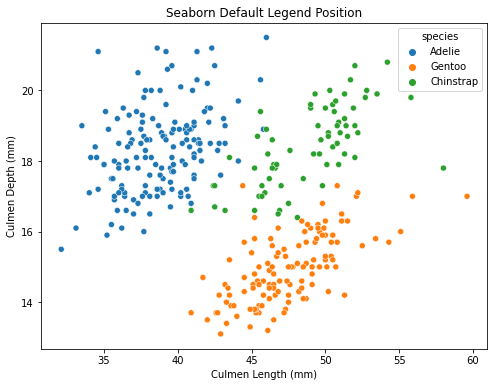

In [16]:
penguins_data="https://raw.githubusercontent.com/datavizpyr/data/master/palmer_penguin_species.tsv"
penguins_df = pd.read_csv(penguins_data, sep="\t")

plt.figure(figsize=(8,6))
sns.scatterplot(x="culmen_length_mm", 
                y="culmen_depth_mm", 
                hue="species",
                data=penguins_df)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Seaborn Default Legend Position")

In [17]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE


In [37]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [38]:
dataset

ENZYMES(600)

In [73]:
loader=DataLoader(dataset,batch_size=3,shuffle=False)
batch=next(iter(loader))
batch

Batch(batch=[85], edge_index=[2, 362], x=[85, 3], y=[3])

In [24]:
oned=dataset[0]
oned

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [33]:
ts=torch.cat([dataset[0].x,dataset[1].x],dim=0)
ts

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [46]:
ts.mean(dim=0)
ts.std(dim=0,unbiased=False)

tensor([0.4770, 0.4770, 0.0000])

In [40]:
oned.edge_attr

In [47]:
ts/ts.std(0)

tensor([[2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [2.0790, 0.0000,    nan],
        [0.0000, 2.0790,    nan],
        [0.0000, 2.0790,    nan],
        [0.0000, 2.0790,    nan],
        [0.0000, 2.0790,    nan],
        [0.0000, 2.0790,    nan],
        [0.000

In [74]:
x=torch.randn(size=[5,7])
x.new_full(size=x.size(),fill_value=7)

ei=torch.stack([torch.arange(0,4),torch.flip(torch.arange(0,4),[0])],dim=0)
ei

ea=torch.randn(size=[4,6])
ea.new_full(size=x.size(),fill_value=6)

y=torch.zeros((1,2))
y[0][0]=1
y[0][1]=2
y

tensor([[1., 2.]])

In [75]:
ei+x.size()[0]

tensor([[5, 6, 7, 8],
        [8, 7, 6, 5]])

In [76]:
d=Data(x=x,edge_index=ei,edge_attr=ea,y=y)
d2=Data(x=x,edge_index=ei+x.size()[0],edge_attr=ea,y=y)

In [77]:
btch=torch.cat([torch.zeros(x.size()[0],dtype=torch.long),torch.ones(x.size()[1],dtype=torch.long)])
btch

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [81]:
B=Batch()
B.edge_index=torch.cat([ei,ei+x.size()[0]],dim=1)
B.x=torch.cat([x,x],dim=0)
B.edge_attr=torch.cat([ea,ea],dim=0)
B.y=torch.cat([y,y],dim=0)
B.batch=btch
B

Batch(batch=[12], edge_attr=[8, 6], edge_index=[2, 8], x=[10, 7], y=[2, 2])

In [83]:
def loader_test():
    return [0,1,2,3,4]
for i in loader_test():
    print(i)

0
1
2
3
4


In [86]:
e=Data()
e.x=d.x
e.edge_index=d.edge_index
e.edge_attr=d.edge_attr
e.y=[5]
e

Data(edge_attr=[4, 6], edge_index=[2, 4], x=[5, 7], y=[1])

In [87]:
e.x

tensor([[ 1.4974,  1.1253,  0.6411, -1.2844, -1.1643, -1.7456, -0.1569],
        [-0.0181,  1.1248,  0.7763, -0.5560, -1.1673, -1.0458, -0.2164],
        [-1.3071,  0.6247,  1.1911,  1.2733,  0.3477,  1.1514, -1.1583],
        [-1.2489, -0.1789, -0.3955,  0.0543,  0.1921, -0.4422, -0.3426],
        [ 0.1801,  0.2600, -0.6310, -1.4351,  0.5896,  1.5931, -1.1077]])

In [93]:
torch.cat([torch.full([5],6),torch.full([5],7)],dim=0)

tensor([6, 6, 6, 6, 6, 7, 7, 7, 7, 7])